In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import APSIMGraphHelpers as AGH
import GraphHelpers as GH
from scipy import stats
import sqlite3

In [5]:
np.power(2,6)

64

In [70]:
Roberts = pd.read_excel('CEData.xlsx',sheet_name='Roberts_etal_1988')
Roberts.set_index(['Cultivar','FinalT','InitPp','FinalPp','InitT','Experiment.Script.TransitionDay'],drop=False,inplace=True)
Roberts.sort_index(axis=0,inplace=True)
Roberts.sort_index(axis=1,inplace=True)

In [71]:
RobCults = Roberts.index.get_level_values(0).drop_duplicates()
RobInitTemps = Roberts.index.get_level_values(4).drop_duplicates()
RobInitPps = Roberts.index.get_level_values(2).drop_duplicates()
RobFinalTemps = Roberts.index.get_level_values(1).drop_duplicates()
RobFinalPps = Roberts.index.get_level_values(3).drop_duplicates()

In [72]:
RobCults

Index(['Laird', 'Precoz'], dtype='object', name='Cultivar')

In [73]:
RobInitTemps

Index([1, 5, 9], dtype='int64', name='InitT')

In [74]:
RobInitPps

Index([8, 16], dtype='int64', name='InitPp')

In [75]:
RobFinalTemps

Index([12, 19], dtype='int64', name='FinalT')

In [76]:
RobFinalPps

Index([11, 16], dtype='int64', name='FinalPp')

In [77]:
cols = dict(zip(RobInitTemps.values,['k','goldenrod','lightskyblue']))
fill = dict(zip(RobInitPps.values,[False,True]))
lins = dict(zip(RobInitPps.values,['D--','o-']))
ylims = dict(zip(RobCults.values,[(500,2000),(300,1000)]))

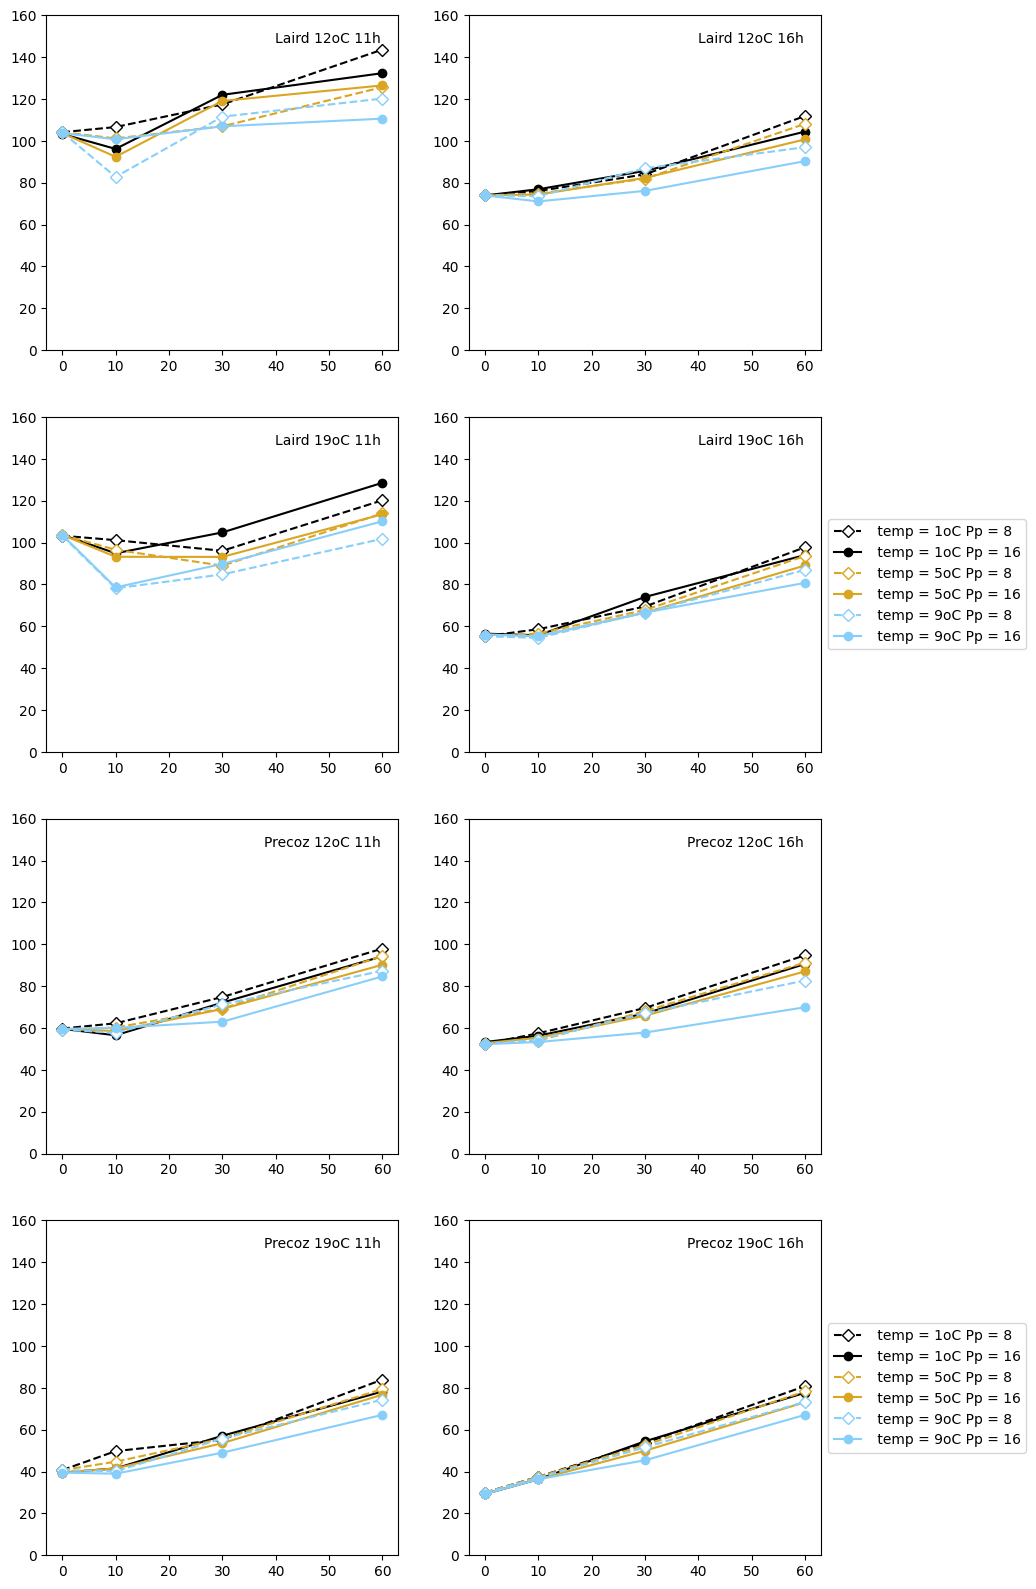

In [78]:
Graph = plt.figure(figsize=(10,20))
pos = 1
for c in RobCults:
    for ft in RobFinalTemps:
        for fp in RobFinalPps:
            ax = Graph.add_subplot(4,2,pos)
            plt.text(0.95,0.95,c+" "+str(ft)+"oC "+str(fp)+"h",horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
            for it in RobInitTemps:
                for ip in RobInitPps:
                    datfilter = (Roberts.Cultivar==c)&(Roberts.FinalT==ft)&(Roberts.FinalPp==fp)&(Roberts.InitT==it)&(Roberts.InitPp==ip)
                    dat = Roberts.loc[datfilter,:]
                    fc = cols[it]
                    ls = lins[ip]
                    if ip == 8:
                        fc = 'w'
                    plt.plot(dat.loc[:,"Experiment.Script.TransitionDay"],dat.loc[:,"Lentil.Phenology.StartFloweringDAS"],ls,color = cols[it],mfc=fc,label=' temp = '+str(it)+'oC '+'Pp = '+str(ip))
            #plt.ylim(ylims[c][0],ylims[c][1])
            plt.ylim(0,160)
            if pos in [4,8]:
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            pos+=1

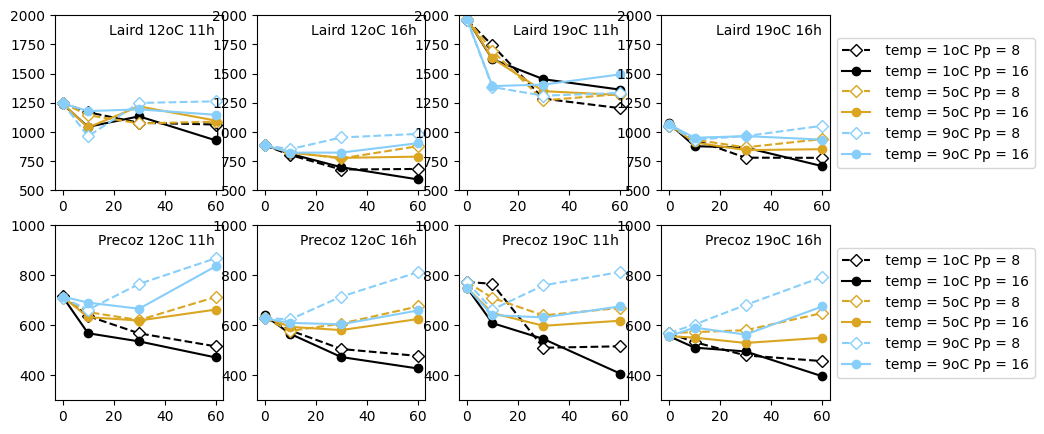

In [79]:
Graph = plt.figure(figsize=(10,5))
pos = 1
for c in RobCults:
    for ft in RobFinalTemps:
        for fp in RobFinalPps:
            ax = Graph.add_subplot(2,4,pos)
            plt.text(0.95,0.95,c+" "+str(ft)+"oC "+str(fp)+"h",horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
            for it in RobInitTemps:
                for ip in RobInitPps:
                    datfilter = (Roberts.Cultivar==c)&(Roberts.FinalT==ft)&(Roberts.FinalPp==fp)&(Roberts.InitT==it)&(Roberts.InitPp==ip)
                    dat = Roberts.loc[datfilter,:]
                    fc = cols[it]
                    ls = lins[ip]
                    if ip == 8:
                        fc = 'w'
                    plt.plot(dat.loc[:,"Experiment.Script.TransitionDay"],dat.TtFirstFlower,ls,color = cols[it],mfc=fc, label=' temp = '+str(it)+'oC '+'Pp = '+str(ip) )
            plt.ylim(ylims[c][0],ylims[c][1])
            if pos in [4,8]:
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            pos+=1

In [80]:
Summerfield = pd.read_excel('CEData.xlsx',sheet_name='Summerfield_etal_1985')
Summerfield.set_index(['Cultivar','FinalT','InitPp','FinalPp','InitT','Experiment.Script.TransitionDay'],drop=False,inplace=True)
Summerfield.sort_index(axis=0,inplace=True)
Summerfield.sort_index(axis=1,inplace=True)

In [81]:
SumCults = Summerfield.index.get_level_values(0).drop_duplicates()
SumInitTemps = Summerfield.index.get_level_values(4).drop_duplicates()
SumInitPps = Summerfield.index.get_level_values(2).drop_duplicates()
SumFinalTemps = Summerfield.index.get_level_values(1).drop_duplicates()
SumFinalPps = Summerfield.index.get_level_values(3).drop_duplicates()
SumInitDurats = Summerfield.index.get_level_values(5).drop_duplicates()

In [82]:
SumCults

Index(['Ethiopia', 'Laird', 'Precoz'], dtype='object', name='Cultivar')

In [83]:
SumInitTemps

Index([1.5], dtype='float64', name='InitT')

In [84]:
SumInitPps

Index([0], dtype='int64', name='InitPp')

In [85]:
SumFinalTemps

Index([ 9.333333333333334, 10.958333333333334, 12.583333333333334,
       12.666666666666666, 14.666666666666666, 15.291666666666666,
       15.541666666666666, 15.916666666666666,               18.0,
       18.416666666666668,             19.875,              21.75],
      dtype='float64', name='FinalT')

In [86]:
SumFinalPps

Index([10, 13, 16], dtype='int64', name='FinalPp')

In [87]:
SumInitDurats

Index([0, 30], dtype='int64', name='Experiment.Script.TransitionDay')

In [88]:
cols = dict(zip(SumFinalPps.values,['grey','darkgoldenrod','darkorange']))
fill = dict(zip(SumInitDurats.values,[False,True]))
lins = dict(zip(SumInitDurats.values,['o--','o-']))
#ylims = dict(zip(RobCults.values,[(500,2000),(300,1000)]))
verns = dict(zip(SumInitDurats.values,['Nil','Chill']))

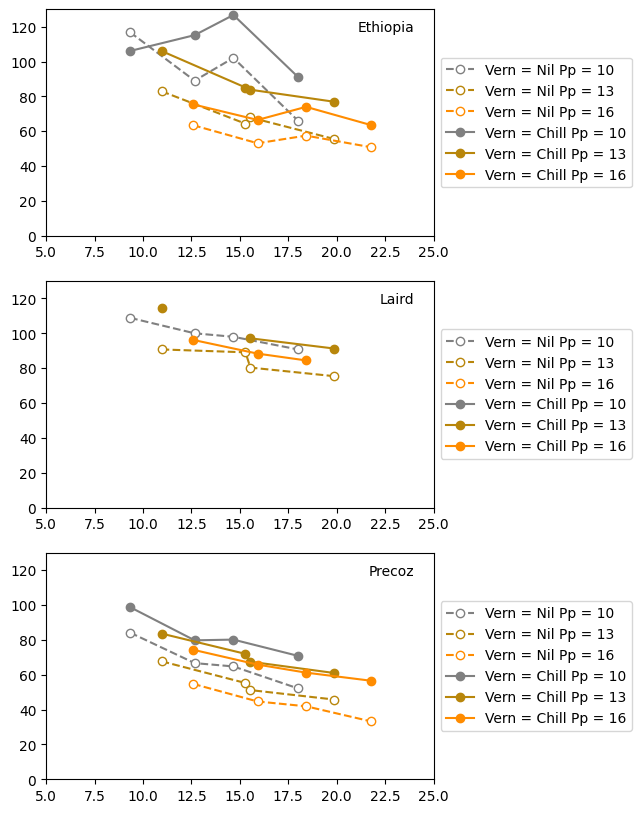

In [89]:
Graph = plt.figure(figsize=(5,10))
pos = 1
for c in SumCults:
    ax = Graph.add_subplot(3,1,pos)
    plt.text(0.95,0.95,c,horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    for id in SumInitDurats:
        for fp in SumFinalPps:
            datfilter = (Summerfield.Cultivar==c)&(Summerfield.loc[:,"Experiment.Script.TransitionDay"]==id)&(Summerfield.FinalPp==fp)
            dat = Summerfield.loc[datfilter,:]
            fc = cols[fp]
            ls = lins[id]
            if id == 0:
                fc = 'w'
            plt.plot(dat.FinalT,dat.loc[:,"Lentil.Phenology.StartFloweringDAS"],ls,color = cols[fp],mfc=fc,label = 'Vern = '+str(verns[id])+' Pp = '+str(fp))
    #plt.ylim(ylims[c][0],ylims[c][1])
    plt.ylim(0,130)
    plt.xlim(5,25)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    pos+=1

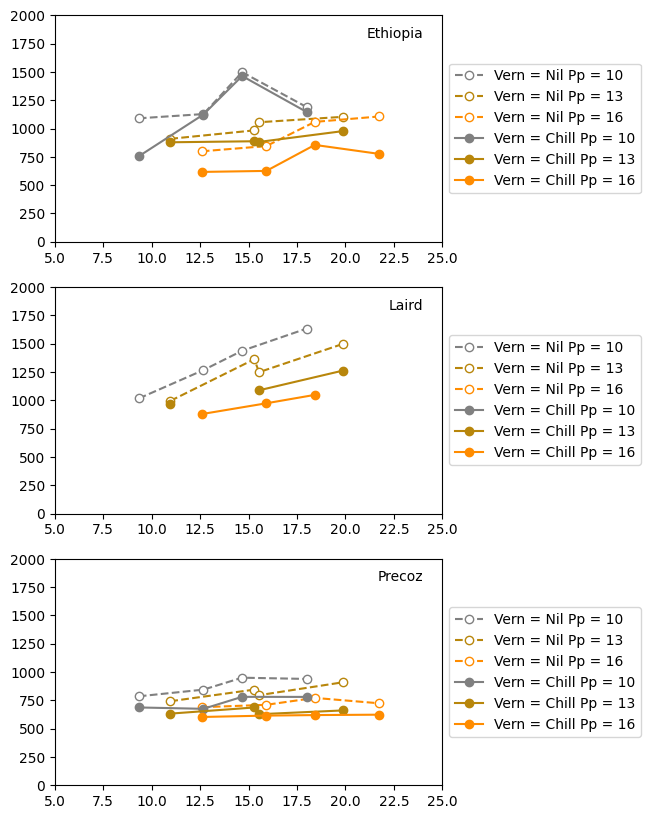

In [90]:
Graph = plt.figure(figsize=(5,10))
pos = 1
for c in SumCults:
    ax = Graph.add_subplot(3,1,pos)
    plt.text(0.95,0.95,c,horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    for id in SumInitDurats:
        for fp in SumFinalPps:
            datfilter = (Summerfield.Cultivar==c)&(Summerfield.loc[:,"Experiment.Script.TransitionDay"]==id)&(Summerfield.FinalPp==fp)
            dat = Summerfield.loc[datfilter,:]
            fc = cols[fp]
            ls = lins[id]
            if id == 0:
                fc = 'w'
            plt.plot(dat.FinalT,dat.TtFirstFlower,ls,color = cols[fp],mfc=fc,label = 'Vern = '+str(verns[id])+' Pp = '+str(fp))
    #plt.ylim(ylims[c][0],ylims[c][1])
    plt.ylim(0,2000)
    plt.xlim(5,25)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    pos+=1

In [91]:
Roberts86 = pd.read_excel('CEData.xlsx',sheet_name='Roberts_etal_1986')
Roberts86.set_index(['Cultivar','FinalT','InitPp','FinalPp','InitT','Experiment.Script.TransitionDay'],drop=False,inplace=True)
Roberts86.sort_index(axis=0,inplace=True)
Roberts86.sort_index(axis=1,inplace=True)

In [92]:
Rob86Cults = Roberts86.index.get_level_values(0).drop_duplicates()
Rob86InitTemps = Roberts86.index.get_level_values(4).drop_duplicates()
Rob86InitPps = Roberts86.index.get_level_values(2).drop_duplicates()
Rob86FinalTemps = Roberts86.index.get_level_values(1).drop_duplicates()
Rob86FinalPps = Roberts86.index.get_level_values(3).drop_duplicates()
Rob86InitDurats = Roberts86.index.get_level_values(5).drop_duplicates()

In [93]:
Rob86Cults

Index(['Laird', 'Precoz', 'Syrian'], dtype='object', name='Cultivar')

In [94]:
Rob86InitTemps

Index([21.25, 22.2, 20.5], dtype='float64', name='InitT')

In [95]:
Rob86InitPps

Index([10, 16, 8], dtype='int64', name='InitPp')

In [96]:
Rob86FinalTemps

Index([21.25, 20.5, 22.2], dtype='float64', name='FinalT')

In [97]:
Rob86FinalPps

Index([16, 10, 8], dtype='int64', name='FinalPp')

In [98]:
Rob86InitDurats

Index([0, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49], dtype='int64', name='Experiment.Script.TransitionDay')

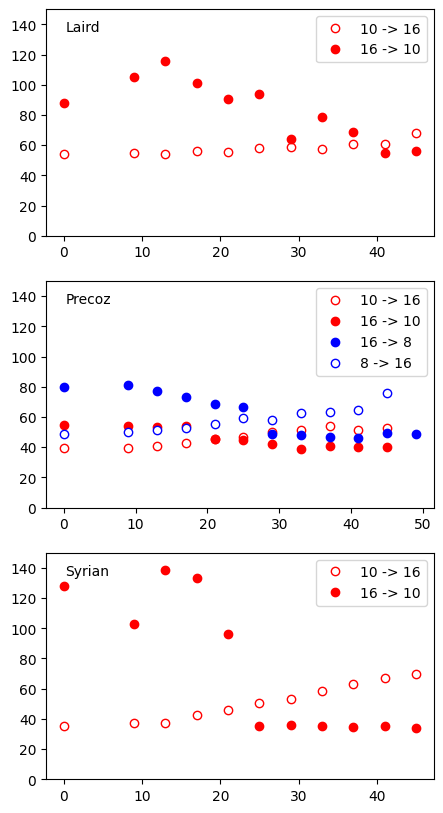

In [99]:
Graph = plt.figure(figsize=(5,10))
pos = 1
for c in Rob86Cults:
    ax = Graph.add_subplot(3,1,pos)
    plt.text(0.05,0.95,c,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    for ip in Rob86InitPps:
        for fp in Rob86FinalPps:
            #if (ip != fp):
            datfilter = (Roberts86.Cultivar==c)&(Roberts86.InitPp==ip)&(Roberts86.FinalPp==fp)
            dat = Roberts86.loc[datfilter,:]
            if (len(dat.Cultivar)>0):
                if ip == 8:
                    ec = 'b'
                    fc = 'w'
                if ip == 10:
                    ec = 'r'
                    fc = 'w'
                if ip == 16:
                    if fp == 8:
                        ec = 'b'
                        fc = 'b'
                    if fp == 10:
                        ec = 'r'
                        fc = 'r'
                plt.plot(dat.loc[:,"Experiment.Script.TransitionDay"],dat.loc[:,"Lentil.Phenology.StartFloweringDAS"],'o',mfc = fc, mec = ec,label = str(ip)+' -> '+str(fp))
    #plt.ylim(ylims[c][0],ylims[c][1])
    plt.ylim(0,150)
    #plt.xlim(5,25)
    plt.legend()
    pos+=1


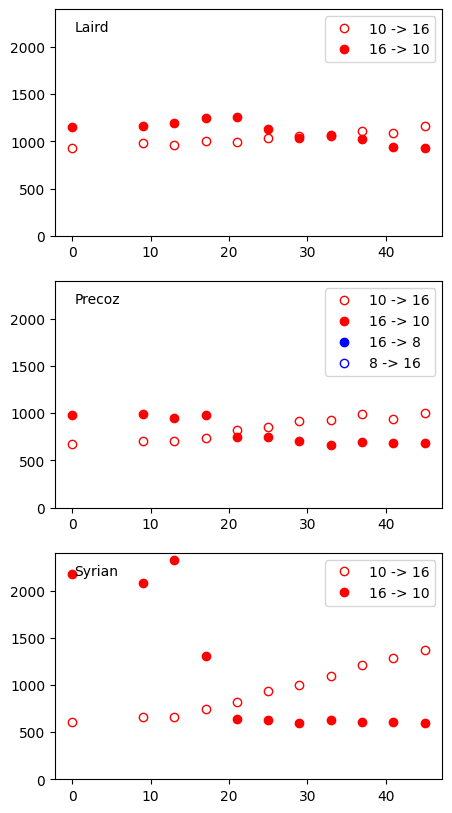

In [100]:
Graph = plt.figure(figsize=(5,10))
pos = 1
for c in Rob86Cults:
    ax = Graph.add_subplot(3,1,pos)
    plt.text(0.05,0.95,c,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    for ip in Rob86InitPps:
        for fp in Rob86FinalPps:
            #if (ip != fp):
            datfilter = (Roberts86.Cultivar==c)&(Roberts86.InitPp==ip)&(Roberts86.FinalPp==fp)
            dat = Roberts86.loc[datfilter,:]
            if (len(dat.Cultivar)>0):
                if ip == 8:
                    ec = 'b'
                    fc = 'w'
                if ip == 10:
                    ec = 'r'
                    fc = 'w'
                if ip == 16:
                    if fp == 8:
                        ec = 'b'
                        fc = 'b'
                    if fp == 10:
                        ec = 'r'
                        fc = 'r'
                plt.plot(dat.loc[:,"Experiment.Script.TransitionDay"],dat.TtFirstBud,'o',mfc = fc, mec = ec,label = str(ip)+' -> '+str(fp))
    #plt.ylim(ylims[c][0],ylims[c][1])
    plt.ylim(0,2400)
    #plt.xlim(5,25)
    plt.legend()
    pos+=1


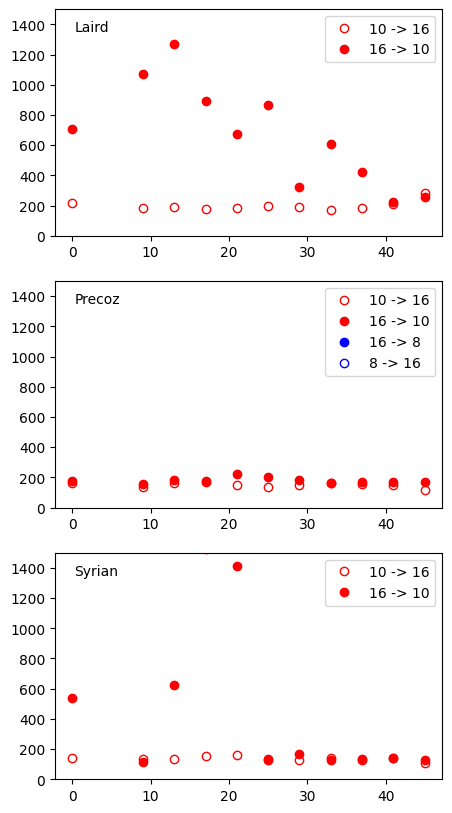

In [101]:
Graph = plt.figure(figsize=(5,10))
pos = 1
for c in Rob86Cults:
    ax = Graph.add_subplot(3,1,pos)
    plt.text(0.05,0.95,c,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    for ip in Rob86InitPps:
        for fp in Rob86FinalPps:
            #if (ip != fp):
            datfilter = (Roberts86.Cultivar==c)&(Roberts86.InitPp==ip)&(Roberts86.FinalPp==fp)
            dat = Roberts86.loc[datfilter,:]
            if (len(dat.Cultivar)>0):
                if ip == 8:
                    ec = 'b'
                    fc = 'w'
                if ip == 10:
                    ec = 'r'
                    fc = 'w'
                if ip == 16:
                    if fp == 8:
                        ec = 'b'
                        fc = 'b'
                    if fp == 10:
                        ec = 'r'
                        fc = 'r'
                plt.plot(dat.loc[:,"Experiment.Script.TransitionDay"],dat.TtFirstFlower-dat.TtFirstBud,'o',mfc = fc, mec = ec,label = str(ip)+' -> '+str(fp))
    #plt.ylim(ylims[c][0],ylims[c][1])
    plt.ylim(0,1500)
    #plt.xlim(5,25)
    plt.legend()
    pos+=1
